## **Pizza Sales Analysis**

#### The aim of the project is to do an analysis on a pizza sales data. The dataset is in CSV format, downloaded from kaggle.
#### This project mainly focuses on the financial metrics to measure the revenue earned and to see if there are any trends in pizza orders 

### **Table of Contents**

 #### 1.Importing Libraries
 #### 2.Data Cleaning
         2.1 Converting the Dataset into Dataframe
         2.2 Converting the Columns into appropriate Data Types
         2.3 Creating New Columns
 #### 3.Analysis
         3.1 Gross Revenue by Month
         3.2 Average Order Value(AOV) by Month
         3.3 Total Sales by each Pizza
         3.4 Total Quantity Sold by each Pizza Category
         3.5 Peak hours
         3.6 Common Pizza Combinations
 #### 4.Conclusion

#### **1. Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### **2. Data Cleaning**

#### 2.1 Converting the Dataset into Dataframe

In [69]:
pz_df=pd.read_csv('D:/VCA/Input Files/pizza_sales.csv')

pz_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
pz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


#### 2.2 Converting the Columns into appropriate Data Types

#### *Converting pizza_id,order_id,quantity into int64 type*

In [3]:
pz_df = pz_df.astype({"pizza_id": "int64","order_id": "int64","quantity": "int64"})
pz_df = pz_df.astype({"pizza_id": "string", "order_id": "string"})
pz_df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


#### *Formatting order_date*

In [4]:
pz_df['order_date']=pz_df['order_date'].str.replace('-','/')

pz_df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31/12/2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


#### 2.3 Creating New Columns

#### *Creating month and hour columns*

In [5]:
pz_df['month'] = pd.to_datetime(pz_df['order_date'],format="%d/%m/%Y").dt.month

pz_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1


In [6]:
pz_df['hour'] = pd.to_datetime(pz_df['order_time'],format="%H:%M:%S").dt.hour
pz_df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,hour
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,12,21
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,12,21
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,12,21
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,12,22
48619,48620,21350,bbq_ckn_s,1,31/12/2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,12,23


In [13]:
pz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  string 
 1   order_id           48620 non-null  string 
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
 12  month              48620 non-null  int32  
 13  hour               48620 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(7), string(2)
memory usage: 4.8+ MB


### **3. Analysis**

In [7]:
# Storing the color's hexdecimal values in string variables
red='#FF3F33'
ocean='#075B5E'
orange='#FF7D29'
sage='#9FC87E'

### 3.1 Gross Revenue by Month

       total_price
month             
1         69793.30
2         65159.60
3         70397.10
4         68736.80
5         71402.75
6         68230.20
7         72557.90
8         68278.25
9         64180.05
10        64027.60
11        70395.35
12        64701.15


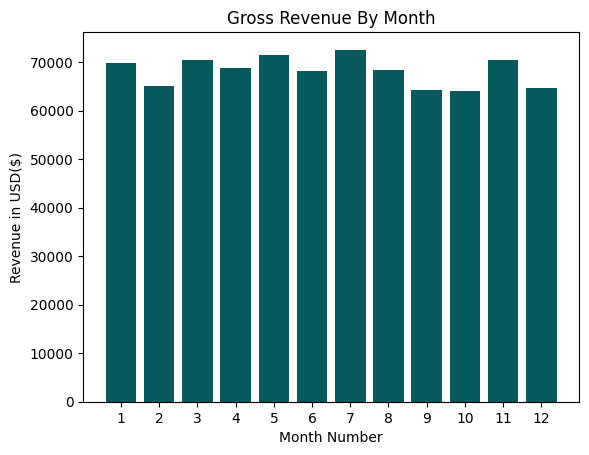

In [8]:
sales_by_month=pz_df.groupby('month').sum()[['total_price']]
mon=range(1,13)
print(sales_by_month)

plt.bar(mon,sales_by_month['total_price'],color=ocean)
plt.xticks(mon)
plt.xlabel('Month Number')
plt.title('Gross Revenue By Month')
plt.ylabel('Revenue in USD($)')
plt.show()

#### The Gross Revenue is the total revenue earned by pizza sales without any deductions 

#### The above bar graph shows gross revenue per month.The X-axis is the month number which indicates the corresponding month (numbers 1 to 12 is  matched to the month number from January to December) and Y-axis revenue earned in USD. July(month number 7) has the maximum gross revenue with 72558 USD and the month October has minimum gross revenue with 64028 USD.

#### The bar graph clearly shows that there is a very little variability between the gross revenue of the months which implies that there is little to no seasonal impact on the revenue both positively or negatively. The data shows that the business carters to steady demand.

### 3.2 Average Order Value(AOV) by Month

In [9]:
order_count=[a for a in pz_df.groupby('month').count()['order_id']]
aov=list()
for i in range(1,13):
    r=sales_by_month['total_price'][i]
    aov.append(r/order_count[i-1])
    

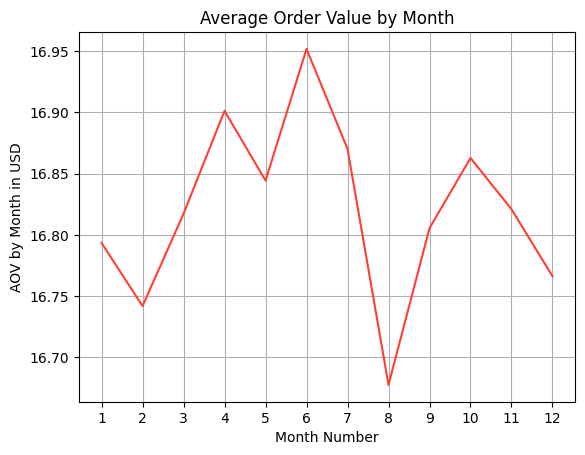

In [10]:
plt.plot(mon,aov,color=red)
plt.xticks(mon)
plt.grid()
plt.title('Average Order Value by Month')
plt.xlabel('Month Number')
plt.ylabel('AOV by Month in USD')
plt.show()

#### The Average Order Value(AOV) is the average amount spent per transaction. AOV = total revenue/number of orders.
#### It is the average amount spent by a customer per order 

#### In the above graph, the X-axis is the month number which indicates the corresponding month (numbers 1 to 12 is matched to the month number from January to December) and the Y-axis shows the Average Order Value(AOV) by month in USD. The month August has the minimum AOV of 16.68 USD and the maximum AOV of 16.95 USD in the month of June. 

#### Both the graph and the quartile range (0.27 USD) indicates that there is very little variability which indicate stable customer spending behavior and there is opportunity to experiment with new offerings to increase AOV. The little variablity in AOV can be due to the stability in pricing as the price fluctuation of the pizza is very less

### 3.3 Total Sales by each Pizza

In [32]:
avg_sale = (pz_df['total_price'].sum())/len(list(pz_df['pizza_name'].unique()))
# Calculating Average Sales

Average Sales:  25558.1265625


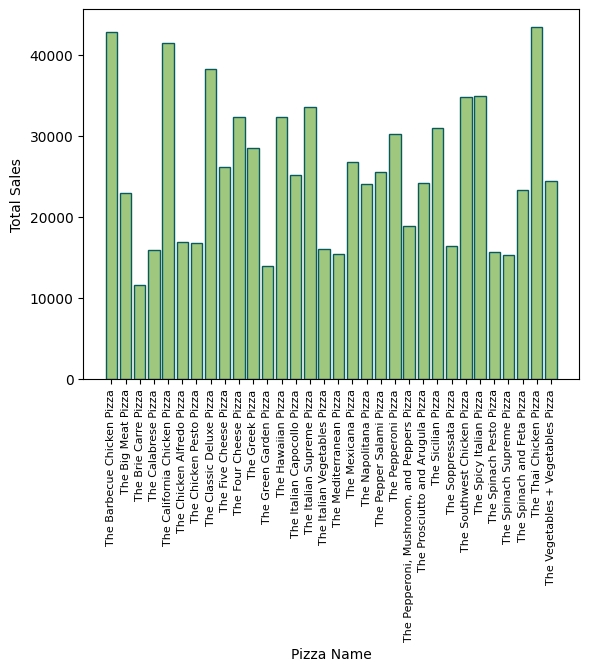

Average Sales:  25558.1265625
pizza_name
The Barbecue Chicken Pizza                    42768.00
The Big Meat Pizza                            22968.00
The Brie Carre Pizza                          11588.50
The Calabrese Pizza                           15934.25
The California Chicken Pizza                  41409.50
The Chicken Alfredo Pizza                     16900.25
The Chicken Pesto Pizza                       16701.75
The Classic Deluxe Pizza                      38180.50
The Five Cheese Pizza                         26066.50
The Four Cheese Pizza                         32265.70
The Greek Pizza                               28454.10
The Green Garden Pizza                        13955.75
The Hawaiian Pizza                            32273.25
The Italian Capocollo Pizza                   25094.00
The Italian Supreme Pizza                     33476.75
The Italian Vegetables Pizza                  16019.25
The Mediterranean Pizza                       15360.50
The Mexicana Pizza      

In [33]:
res=pz_df.groupby('pizza_name').sum()['total_price']
pizzas=[k for k,df in pz_df.groupby('pizza_name')]


plt.bar(pizzas,res,color=sage,edgecolor=ocean)
plt.xticks(pizzas,rotation='vertical',size=8)
plt.xlabel('Pizza Name')
plt.ylabel('Total Sales')
plt.show()
print('Average Sales: ',avg_sale)
print(res)

### 3.4 Total Quantity Sold by each Pizza Category

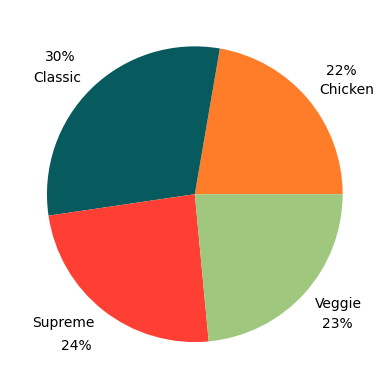

In [17]:
sold_by_q = pz_df.groupby('pizza_category').sum()['quantity']

plt.pie(sold_by_q,labels=sold_by_q.keys(),colors=[orange,ocean,red,sage],autopct='%2.f%%',pctdistance=1.3)
plt.show()

### Pizzas under each category

In [61]:
for x,y in pz_df.groupby(by='pizza_category'):
    print(f'{x}\n{y['pizza_name'].unique()}\n')

Chicken
['The Thai Chicken Pizza' 'The Barbecue Chicken Pizza'
 'The Southwest Chicken Pizza' 'The California Chicken Pizza'
 'The Chicken Pesto Pizza' 'The Chicken Alfredo Pizza']

Classic
['The Hawaiian Pizza' 'The Classic Deluxe Pizza' 'The Greek Pizza'
 'The Italian Capocollo Pizza' 'The Pepperoni Pizza' 'The Big Meat Pizza'
 'The Napolitana Pizza' 'The Pepperoni, Mushroom, and Peppers Pizza']

Supreme
['The Italian Supreme Pizza' 'The Prosciutto and Arugula Pizza'
 'The Spinach Supreme Pizza' 'The Spicy Italian Pizza'
 'The Soppressata Pizza' 'The Calabrese Pizza' 'The Pepper Salami Pizza'
 'The Sicilian Pizza' 'The Brie Carre Pizza']

Veggie
['The Five Cheese Pizza' 'The Mexicana Pizza' 'The Green Garden Pizza'
 'The Spinach Pesto Pizza' 'The Vegetables + Vegetables Pizza'
 'The Four Cheese Pizza' 'The Italian Vegetables Pizza'
 'The Mediterranean Pizza' 'The Spinach and Feta Pizza']



#### With 30% of pizza sold are classic pizza and the top 2 pizzas with highest sales are also classic pizzas, The Classic pizzas are popular and well preferred by the public. Other 3 categories has less variability of 1% each in total quantity sold with each other. 

#### Eventhough the chicken pizzas has higher sales the quantity sold is compartively low with 22% this suggests that price of the chicken pizzas might be higher and only few of the chicken pizzas are well liked while other's sales are lower than average sales. Also, comapred to other categories chicken pizzas has less products which could have impacted the quantity sold. 

#### While supereme pizzas and veggie pizzas have many products their sales were lower than average sales. Pizzas with Spinach as the star ingredient had lower sales. This indicates that veggie pizzas needs more flavors other than greens as the primary ingredients.

### 3.5 Peak Hours

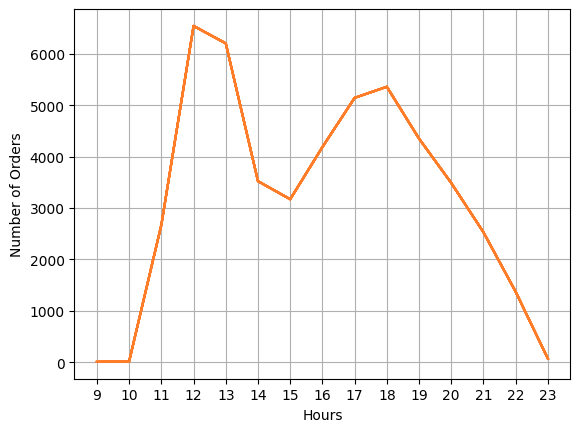

In [12]:
hours = [hour for hour,df in pz_df.groupby('hour')]

plt.plot(hours,pz_df.groupby('hour').count(),color=orange)
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

#### The X-axis shows the Hours (24-Hour clock) and the Y-axis shows the number of orders placed. There is a rapid increase of orders from 10 AM and reaching the highest peak at 12 Noon with 6600 (approx.) orders. Then the numbers of orders dips around afternoon, again it gradually increases and reaching the second peak at 6 PM with 5200 (approx.) orders and then the number of orders gradually decreases. This trend indicates that majority of customers prefers pizza for lunch and in the evening to have good time with their relations.

### 3.6 Common Pizza Combinations

In [41]:
df = pz_df[pz_df['order_id'].duplicated(keep=False)]

df['Grouped'] = df.groupby('order_id')['pizza_name'].transform(lambda x: '|'.join(x))

df=df[['order_id','Grouped']].drop_duplicates()
df.head()

C:\Users\Lenovo-Laptop\AppData\Local\Temp\ipykernel_17464\4260593946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('order_id')['pizza_name'].transform(lambda x: '|'.join(x))


,order_id,Grouped
1,2,The Classic Deluxe Pizza|The Five Cheese Pizza...
6,3,The Italian Supreme Pizza|The Prosciutto and A...
10,6,The Barbecue Chicken Pizza|The Greek Pizza
14,9,The Classic Deluxe Pizza|The Green Garden Pizz...
23,10,The Mexicana Pizza|The Southwest Chicken Pizza


In [40]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list = row.split('|')
    count.update(Counter(combinations(row_list,2)))

for k,v in count.most_common(10):
    print(k, v)

('The Hawaiian Pizza', 'The Thai Chicken Pizza') 319
('The Barbecue Chicken Pizza', 'The Pepperoni Pizza') 308
('The Pepperoni Pizza', 'The Thai Chicken Pizza') 299
('The Hawaiian Pizza', 'The Pepperoni Pizza') 299
('The Classic Deluxe Pizza', 'The Hawaiian Pizza') 296
('The Classic Deluxe Pizza', 'The Pepperoni Pizza') 295
('The California Chicken Pizza', 'The Hawaiian Pizza') 294
('The California Chicken Pizza', 'The Pepperoni Pizza') 292
('The Barbecue Chicken Pizza', 'The Hawaiian Pizza') 292
('The Barbecue Chicken Pizza', 'The California Chicken Pizza') 287


#### Based on the sales data, these are the top 10 combination of 2 pizzas bought together along with the number of orders bought these together. These can be potential combo offers to increase the sales. These combinations have only 7 distinct pizzas and most of the combinations are a classic and chicken pizzas bought together. Also, the sales of top 10 combination has less variability. 

#### With less variability being the theme of the most combinations sold, the majority of the customers favors chicken and classic pizzas. Also, these 7 pizza's total sales is between 30,000 to 50,000 USD and the top performing products are The Thai Chicken Pizza and The Barbecue Chicken Pizza which are also a part combos bought together. 

#### The Hawaiian pizza and the Pepperoni pizza are repeated in many of the given combos indicating that they are the go-to pizza to buy.

### 4. Conclusion

#### Based on this analysis, many information were found. Gross Revenue by month had less variability due to stable prices. This also shows that the shop has stable customers which allows to introduce new offers and menu items.

#### The Average order value(AOV) by month nearly reached 17 USD but currently its decreasing. Bringing new combo offers might increase the AOV. In total sales, The Thai Chicken Pizza had the most revenue and The Brie Carre Pizza had the least. Overall the Classic pizzas sold the most in quantity and chicken pizzas sold the least because it had less items and some of them had sales lower than average sales, eventhough the top 2 highest revenue earned are chicken pizzas.


#### Thus, overall the company can introduce new combo offers and can introduce new flavors in veggie category. For new combo offers, based on the analysis, the suggestions are: (The Hawaiian Pizza, The Thai Chicken Pizza) and (The Barbecue Chicken Pizza, The Pepperoni Pizza) combos.